## Discussion

### Ensamble Methods
- Ensembles are predictive models that combine predictions from two or more other models. 
- the models that contribute to the ensemble, are called ensemble members. 
- The predictions made by the ensemble members may be combined using statistics, such as mean or mode, or by other method that learn how much to trust each member and under what conditions. 

### Overhead
- Increase computational cost and compexity

### Advantages 
- **Performance**: An ensemble can make better predictions and achieve better performance than any single contributing model
- **Robustness**: An ensemble reduces the spread or dispersion of the predictions and model performance. 



### What are ensemble methods? 
- **Bagging**: homogeneous weak learner models that learn from each other independently in parallel and combine their predictions to determine the model average. 
- **Boosting**: homogensous weak learner model but learn in sequence and adaptively to improve model predictions of a learning algorithm. 
- **Voting**: heterogeneous multiple models and simple statistics are used to combine predictions. 

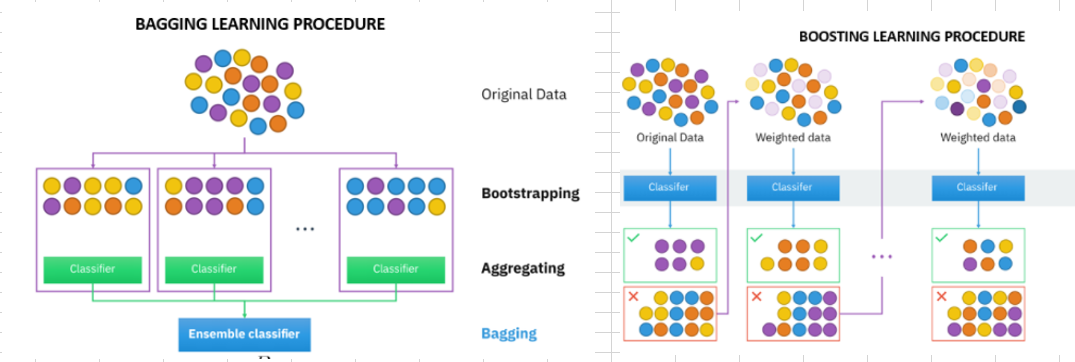

## <span style="color:red"> Bagging Algorithms</span>
 - Bootstrap Aggregation (or Bagging)
 - Takes multiple samples from the training dataset (with replacement), and train a model for each sample. 
 - Final output prediction is averaged predictions of all the models. 
 
### Bagging models
 - Bagged Decision Trees
 - Random Forest
 - Extra Trees

#### 1. Bagged Decision Trees

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("../data/pima-indians-diabetes.csv")

In [ ]:
# split data into train and test 
data_array = data.values
_X = data_array[:,0:8]
y = data_array[:,8]

# instantiate StandardScaler class and fit on data 
scaler = StandardScaler().fit(_X)
X = scaler.transform(_X)

In [ ]:
# define kFold
kfold = KFold(n_splits = 10)
clf = DecisionTreeClassifier()
num_trees = 100
bag1 = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=42)
results1 = cross_val_score(bag1, X, y, cv=kfold)
print(results1.mean())

### But quantify- ???

#### 2. Random Forest
- It is an extension to bagged decision trees
- Samples of training set are taken with replacement
- Trees are constructed in way that reduces the correlation between individual classifiers. 
- No greedy split, rather it is a random split of features for each dataset. 

In [ ]:
# Load Random Forest Classifier Library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bag2 = RandomForestClassifier(n_estimators=100, max_features=3)
results2 = cross_val_score(bag2, X, y, cv=kfold)
print(results2.mean())

#### 3. Extra Trees
- Random trees are constructed from samples of the training dataset.  

In [ ]:
# Load Extra Trees Classifier Library
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
bag3 = ExtraTreesClassifier(n_estimators=100, max_features=3)
results3 = cross_val_score(bag3, X, y, cv=kfold)
print(results3.mean())

## <span style="color:red"> Boosting Algorithms</span>
 -  Boosting algorithms creates sequence of models that attempt to correct the mistakes of the model before them in the sequence. 
 - model predictions are weighted by their accuracy and results are combined to create final ouput prediction.
 
### Boosting models
 - AdaBoost
 - Stochastic Gradient Boosting

#### 1. AdaBoost

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
boost1 = AdaBoostClassifier(n_estimators=100)
results_boost1 = cross_val_score(boost1, X, y, cv=kfold)
print(results_boost1.mean())

#### 2. Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
boost2 = GradientBoostingClassifier(n_estimators=100)
results_boost2 = cross_val_score(boost2, X, y, cv=kfold)
print(results_boost2.mean())

## <span style="color:red"> Voting Ensemble</span>
 -  Voting ensemble is a way to combine the predictions from multiple machine learning models. 
 - Voting algorithm wrap the models and average the predictions of the sub-models 
 

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
# create a bag of models
bag_models = []
bag_models.append(('logistic', LogisticRegression()))
bag_models.append(('cart', DecisionTreeClassifier()))
bag_models.append(('svm', SVC()))

In [ ]:
# create the ensemble model
voting_ensemble = VotingClassifier(bag_models)
results_voting = cross_val_score(voting_ensemble, X, y, cv=kfold)
print(results_voting.mean())